#Set!


### In this game, random cards are generated and all possible sets are returned.
####To run:
  1. Click the "Cell" menu and then choose "Run All"
  2. Use the buttons to evaluate solutions
  3. Amend the dimensions you wish to change in the cell below (HOWEVER Only 'shape','color' and 'edge' can be charted)
  Table solutions will still be available



In [71]:
########################## Inputs ##################################################################################################333


CARD_DIMENSIONS = {'shape':['circle','rectangle','wedge','ellipse'], #these need to be entered as a dict object
                   'color':list(range(1,5)),
                  'edge':['none','thin','thick'],    #edge only has three 'chartable values 'none','thin' and 'thick'
                  }

NUMBER_OF_CARDS = 15


CARDS_IN_A_SET = 3


##################################################################################################################################

_________________

In [72]:
#Ipython code to hide input cells

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>To toggle on/off raw code, click</b> <a href="javascript:code_toggle()">here</a>.''')

In [73]:
from pandas import DataFrame
from numpy import arange,array,mgrid
from numpy.random import choice
from copy import copy
from itertools import combinations
from collections import defaultdict
from IPython.display import display, clear_output
from IPython.html import widgets
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib inline  

In [74]:
class Game:
    """
    Creates a dataframe which represents a deck of cards to use in a game of Set! 
    Returns this deck as both dimensions and values.
    ------------------------------------------------------------------------------
    Parameters:
    dimensions: A dict object with keys corresponding to the dimension name and the values 
    corresponding to the possible coordinates of that dimension. 
    For e.g CARD_DIMENSIONS =  {'shape':['square','circles'],'color':['blue','green']}

    deck_size: The number of random cards that will be generated.
    
    """
    def __init__(self,dimensions={'color':[1,2,3],'shape':['circle','rectangle']},deck_size=25):
        self._df_empty = DataFrame(columns=dimensions.keys(),index=arange(deck_size))
        self.card_df = self._df_empty.apply(lambda x: choice(dimensions[x.name],deck_size))
        self.card_df = self.card_df.drop_duplicates()
        self.card_dimensions = dimensions.keys()
        self.cards = self.card_df.values
    
    

In [75]:
class SetSolver:
    def __init__(self,cards=[['red','circle'],['blue','circle']],set_size=2):
        """
        Generates the all the possibles sets in a game of Set! 
        -------------------------------------------------------
        Parameters:
        cards: Iterable - which represents a collection of cards. for example a list of lists or list of tuples. 
        set_size: Integer - The size of the set collection.
        """
        self._set_size = set_size
        self._cards = cards
        
        #validate inputs        
        try:
            self._dimensions = set(len(dim) for dim in cards)
        except TypeError:
            raise TypeError('Please make sure cards is a nested iterable - eg, list of lists')
        
        if len(self._dimensions) != 1:
            raise ValueError('Please make sure all cards have the same number of dimensions')
            
        if isinstance(self._set_size, int):
            pass
        else:
            raise ValueError('Please make sure set_size is an integer')
                
        
        # a Set! solution is defined as collection of cards which are all the same across the
        # dimensions or all different across them.
        
        def all_or_nothing(dimension,chosen_set_size):
            """
        A function to compare a combination of cards across a dimension and evaluate whether
        the values along that dimension are all the same, or are all different. 

            """
            if len(set(dimension))==1:
                return True
            elif len(set(dimension))==chosen_set_size:
                return True
            else:
                return False
        
        
        #get solution
        
        #generator object of all possible card combinations of the chosen set size.
        self._card_combinations = combinations(self._cards,self._set_size) 
        
        # zip combinations to compare along dimensions
        self._zipped_combinations = [zip(*x) for x in copy(self._card_combinations)]
        
        
        # evaluate whether any of the combinations are solutions and represent as a masked list
        self._mask = (all(all_or_nothing(dim,self._set_size) for dim in comb) for comb in self._zipped_combinations)
        
        # iterate over the full combinations to pull out the solutions
        self.get_Solution = [i for i,j in zip(self._card_combinations,self._mask) if j]
        self.get_Solution_Table = DataFrame(data = self.get_Solution,columns=['Card '+str(i) for i in list(range(1,set_size+1))])


In [76]:
class VisualSolution:
    def __init__(self,set_soln=[],dimensions=[]):
        
        #validate inputs
        
        if len(set_soln)==0:
            raise ValueError('No Solutions Available to visualize')
        self._set_size = len(set_soln[0])
    
        #Visuals for particular graphics   
        def _circle(arg):
            return mpatches.Circle(grid[arg], 0.1, ec="none")

        def _rectangle(arg):
            return mpatches.Rectangle(grid[arg] - [0.025, 0.05], 0.05, 0.1, ec="none")

        def _wedge(arg):
            return mpatches.Wedge(grid[arg], 0.1, 30, 270, ec="none")

        def _ellipse(arg):
            return mpatches.Ellipse(grid[arg], 0.2, 0.1)
    
        self._SHAPES = {'circle':_circle,'rectangle': _rectangle,'wedge':_wedge,'ellipse':_ellipse}
        self._COLORS = {x:(1/8)*x for x in list(range(1,8+1))}
        self._EDGE = {'none':0.0,'thin':2.5,'thick':20}
        
        
        def _get_shape(shape_list):
            return [self._SHAPES[shape](arg=pos) for pos,shape in enumerate(shape_list)]

        def _get_color(color_list):
            return [self._COLORS[idx] for idx in color_list]

        def _get_edge(thickness_list):
            return [self._EDGE[thickness] for thickness in thickness_list]

        self._DIM_FUNCS =  {'shape':_get_shape,'color':_get_color,'edge':_get_edge}    
        
               
        #generate the charts for this solution
    
        self._sections = self._set_size*1j #grids in matplotlib rely on complex numbers
        grid = mgrid[0.2:0.8:self._sections, 0.2:0.8:1j].reshape(2, -1).T
        
        self._zipped_soln = (list(zip(*x)) for x in set_soln)
        
        # create charts
        self._chart_list = []
        for sol in self._zipped_soln:
            self._chart_list.append(defaultdict(int,{y:self._DIM_FUNCS[y](sol[x]) for x,y in enumerate(dimensions)}))
        
        self.chart_list = self._chart_list
    
    

In [77]:
# widget to display the table solution
button = widgets.Button(description="View Solutions as a Table")
display(button)

def on_button_clicked(b):
    clear_output()
    new_game = Game(dimensions=CARD_DIMENSIONS,deck_size=NUMBER_OF_CARDS)
    soln = SetSolver(cards=new_game.cards,set_size=CARDS_IN_A_SET)
    display(soln.get_Solution_Table)
button.on_click(on_button_clicked)

,Card 1,Card 2,Card 3
0,"[3, thick, rectangle]","[4, thin, wedge]","[1, none, circle]"
1,"[3, thick, rectangle]","[4, thin, wedge]","[1, none, ellipse]"
2,"[3, thick, rectangle]","[1, thick, wedge]","[4, thick, ellipse]"
3,"[4, thin, wedge]","[1, none, rectangle]","[3, thick, ellipse]"
4,"[4, thin, wedge]","[1, none, circle]","[3, thick, ellipse]"
5,"[4, thin, wedge]","[4, none, ellipse]","[4, thick, rectangle]"
6,"[4, thin, wedge]","[4, thick, ellipse]","[4, none, rectangle]"
7,"[1, thick, wedge]","[4, thick, rectangle]","[3, thick, ellipse]"
8,"[1, none, rectangle]","[3, none, rectangle]","[4, none, rectangle]"
9,"[1, none, rectangle]","[1, none, circle]","[1, none, ellipse]"


C:\Users\graeme.pillemer\AppData\Local\Continuum\Anaconda\envs\sopy\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


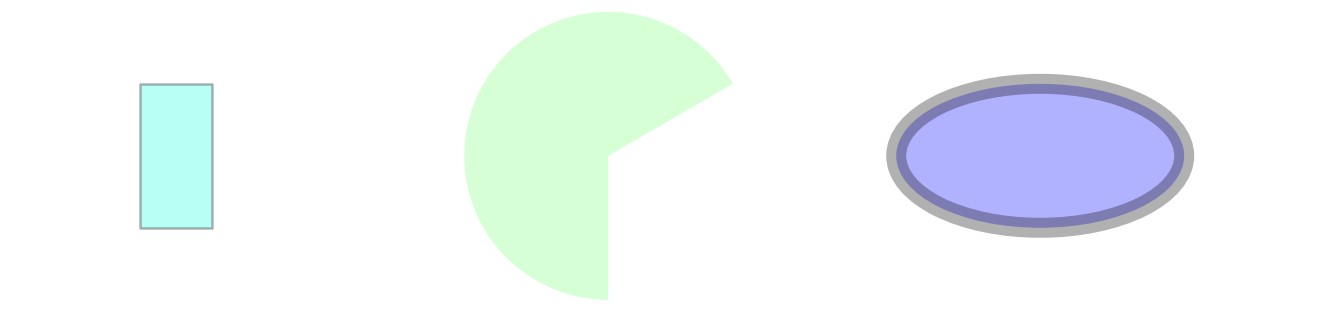

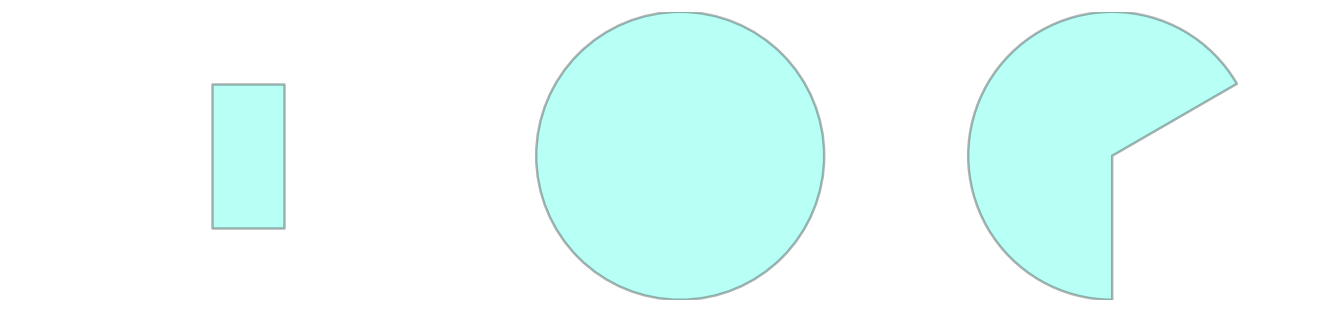

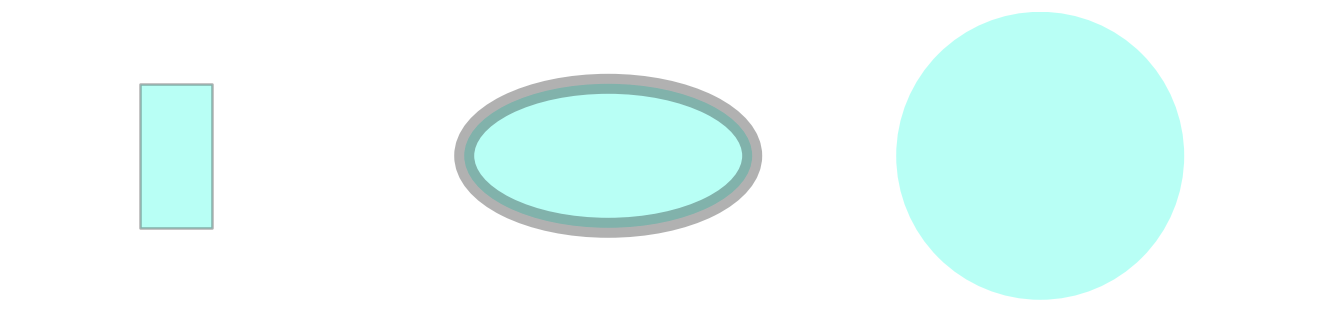

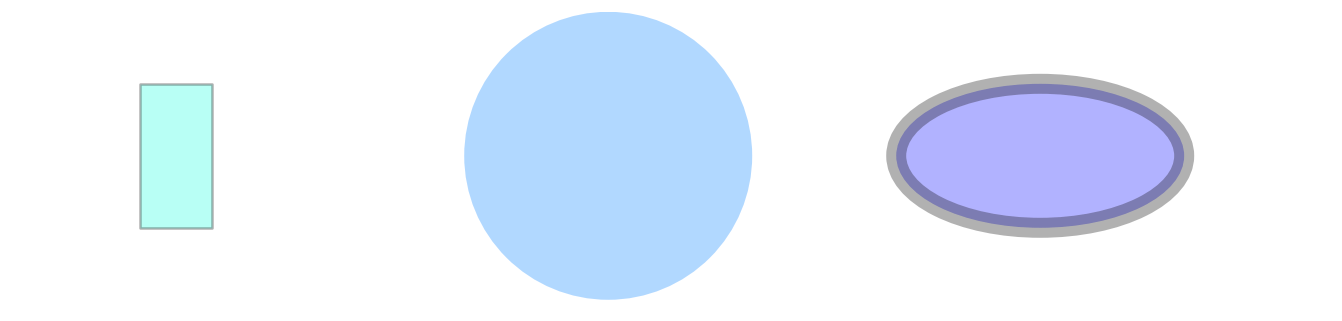

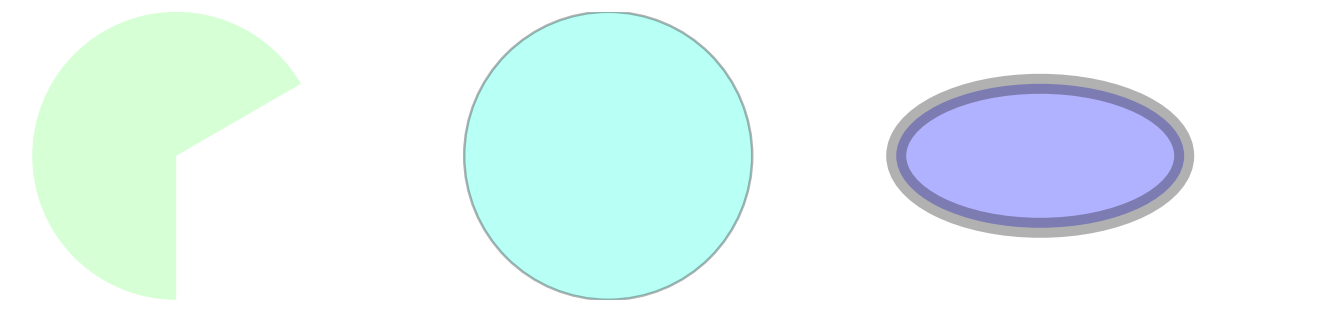

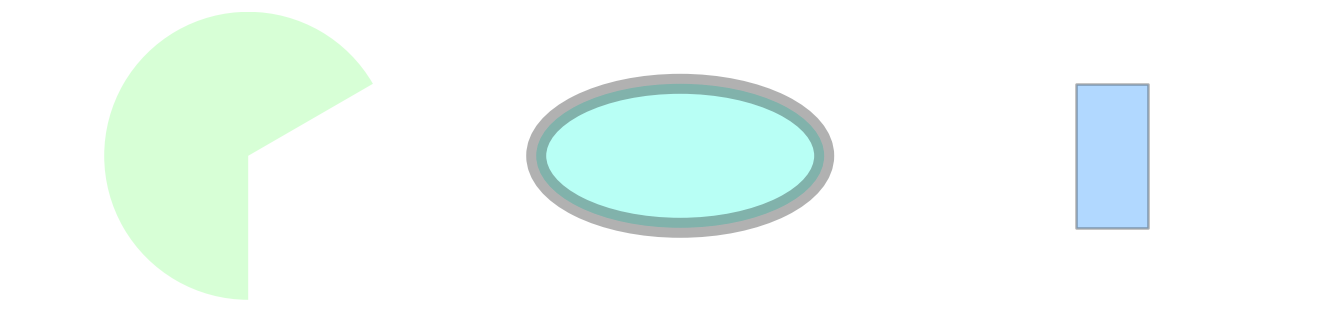

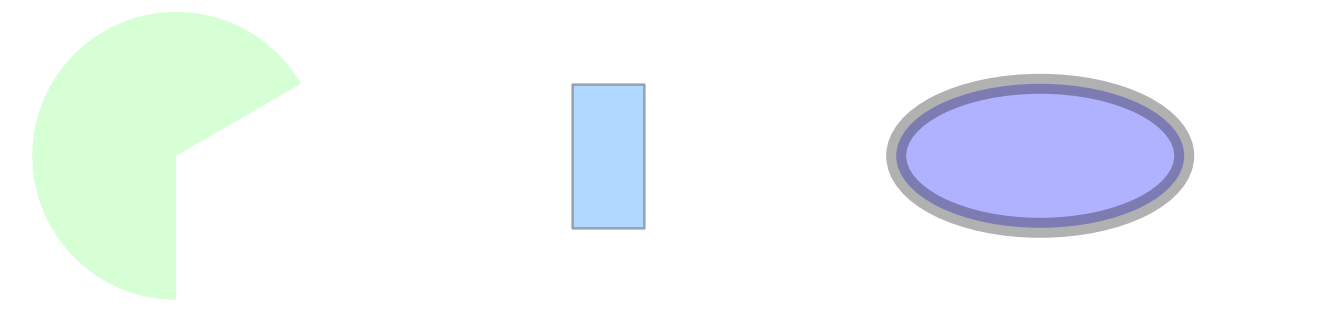

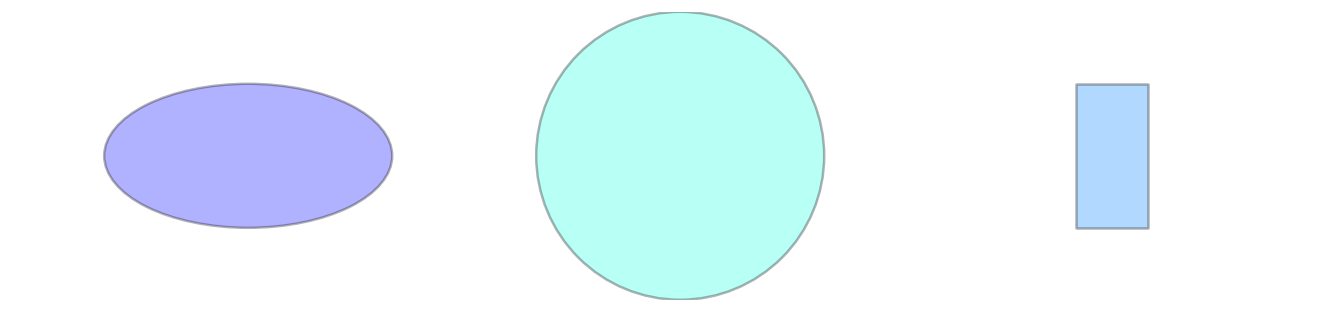

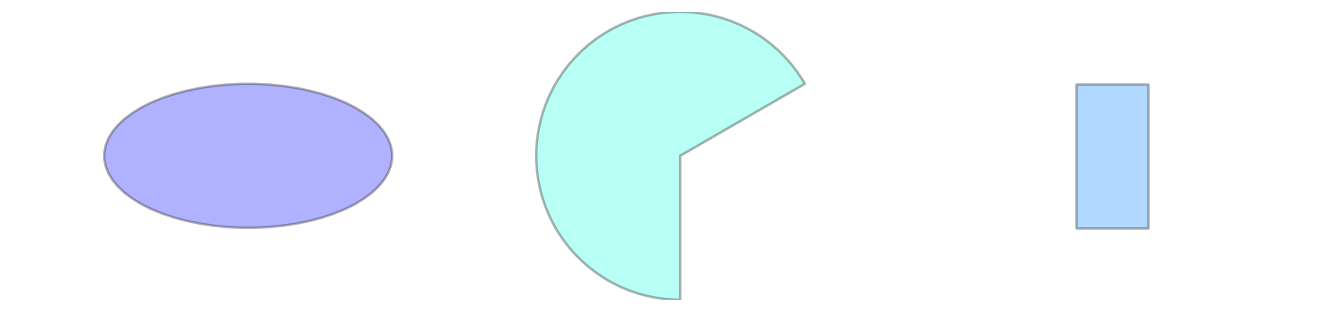

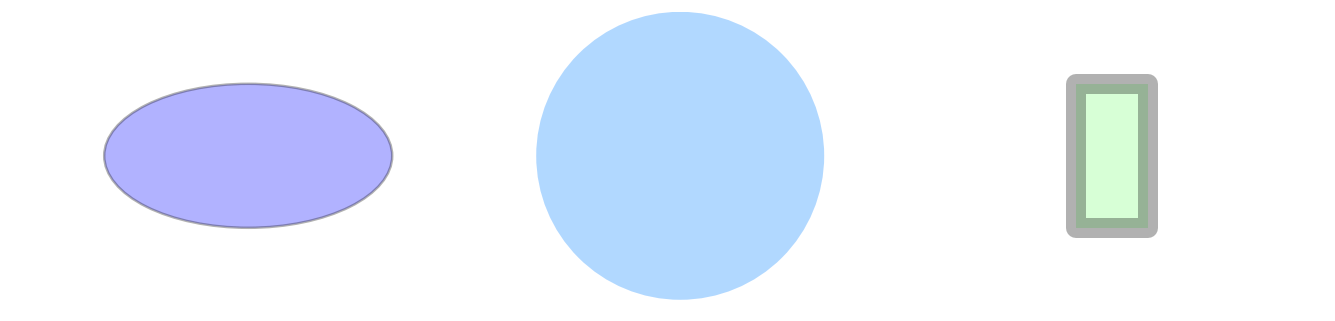

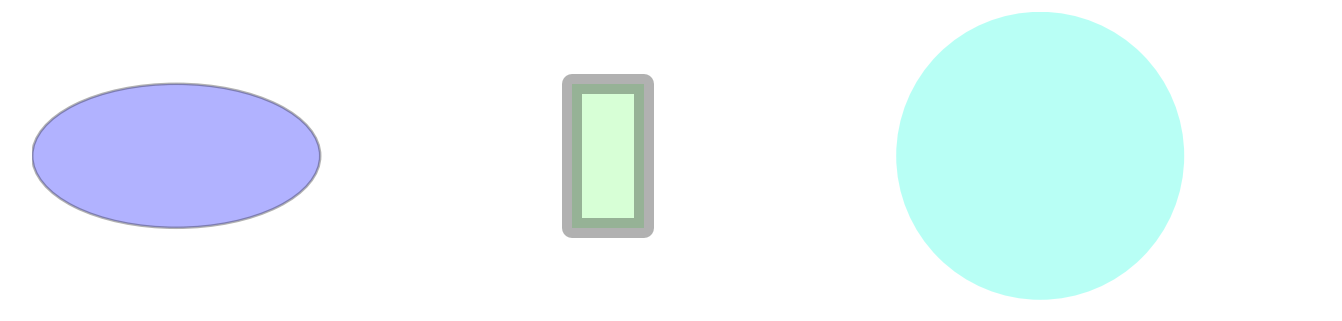

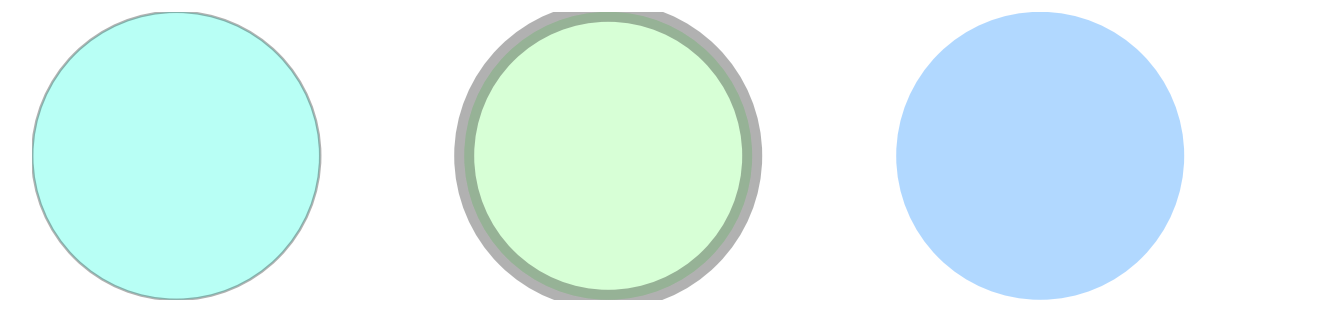

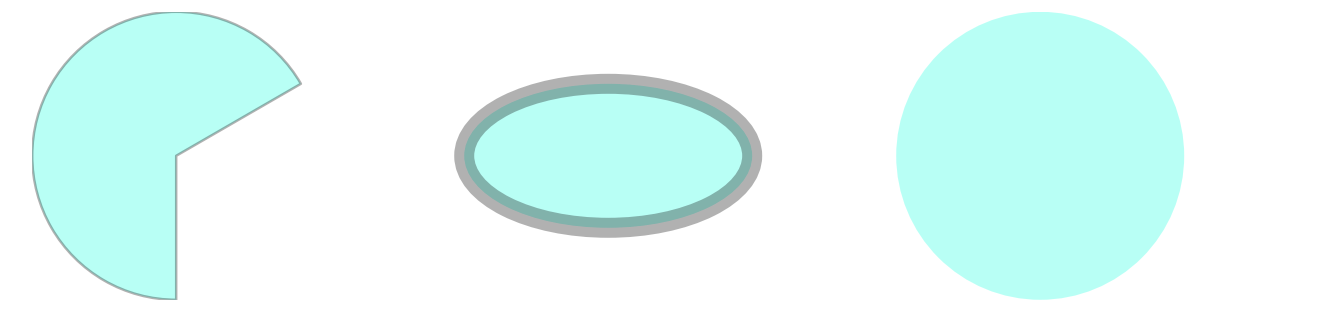

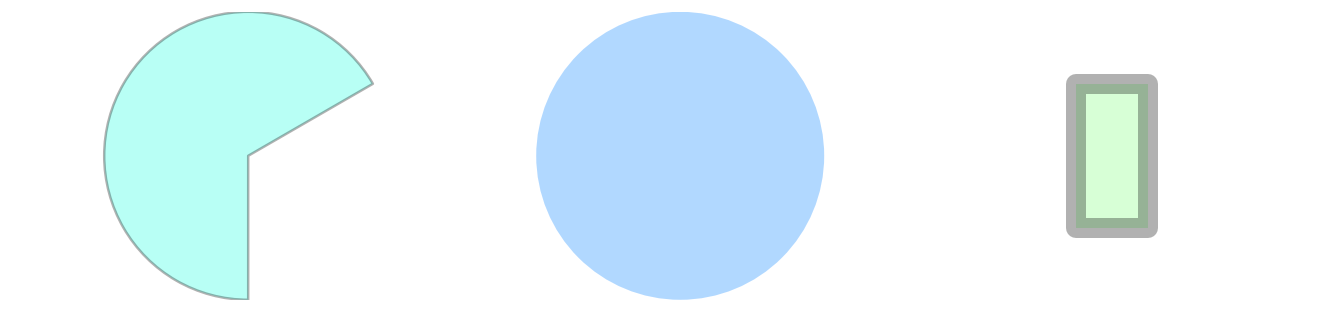

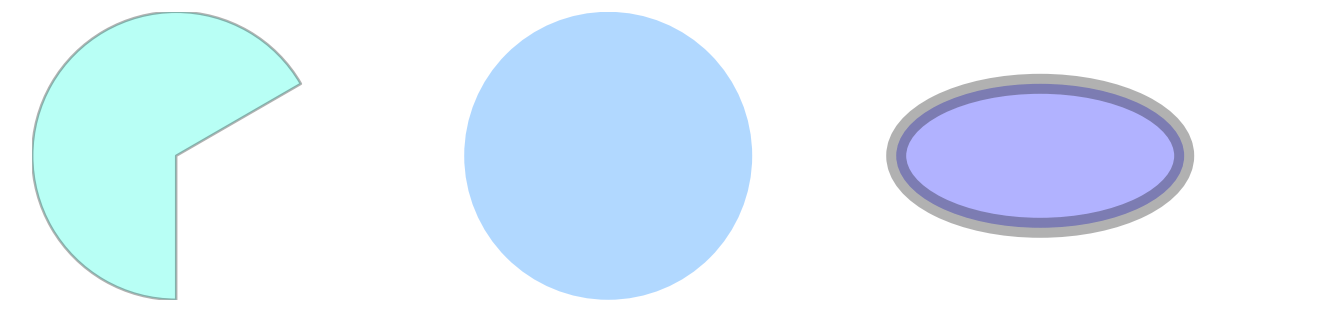

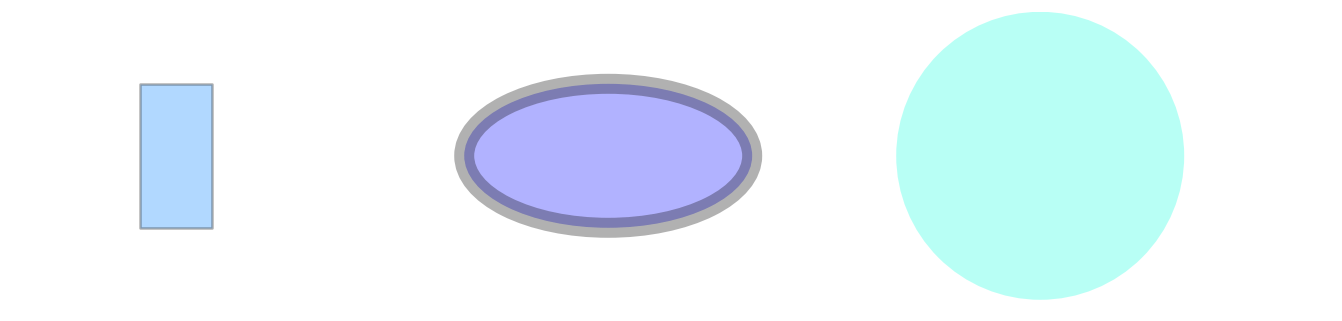

In [78]:
# widget to display the chart solutions
button = widgets.Button(description="View Solutions as Charts")
display(button)

def on_button_clicked(b):
    clear_output()
    CHARTABLE_DIMENSIONS = ['color','shape','edge']

    if any([x not in CHARTABLE_DIMENSIONS for x in CARD_DIMENSIONS]):
        print('Unchartable Dimensions')
    new_game = Game(dimensions=CARD_DIMENSIONS,deck_size=NUMBER_OF_CARDS)
    soln = SetSolver(cards=new_game.cards,set_size=CARDS_IN_A_SET)
    charts = VisualSolution(set_soln=soln.get_Solution,dimensions=new_game.card_dimensions)
    for charts in charts.chart_list:
        fig, ax = plt.subplots(figsize=(6,4))
        patches = charts['shape']
        collection = PatchCollection(patches, alpha=0.3)
        collection.set_array(array(charts['color']))
        collection.set_clim([0, 1])
        collection.set_linewidth(array(charts['edge']))
        ax.add_collection(collection)
        plt.subplots_adjust(left=0, right=3, bottom=0, top=1)
        plt.axis('equal')
        plt.axis('off')
        plt.show()
button.on_click(on_button_clicked)